In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

gt_mapper = {"I":"IP", "K":"KO", "W":"WT", "parental": "parental"}

In [24]:
# define protein 

proteins = { 
    "5'UTR": (1, 708),
    "1A": (709, 1206),
    "2A": (1207, 1278),
    "2B": (1279, 1692),
    "2C": (1693, 2925),
    "3A": (2926, 3361),
    "3B": (3364, 3432),
    "3C": (3433, 4368),
    "RdRp": (4369, 6022),
    "IGR IRES": (6025, 6216),
    "VP1": (6217, 7065),
    "VP4": (7066, 7236),
    "VP2": (7237, 8121),
    "VP3": (8122, 8902),
    "3'UTR": (8903, 11000)
           }

In [25]:
## load mutations

fname = "all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

df = df[df['virus']=='crpv']

df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1].str.split("p").str[1]
df['passage'] = df['passage'].astype(int)
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT'] + " (" + df['AminoAcidChange']+")"

df['position'] = df['position'].astype(int)

df['genotype'] = df['genotype'].apply(lambda x: gt_mapper[x])

df['protein'] = df['position'].apply(lambda x: next((protein for protein, (start, end) in proteins.items() if start <= x <= end), None))

In [26]:
df_top = df.sort_values('frequency')[['protein', 'genotype', 'rep', 'passage', 'mutation', 'frequency']].tail(100)

In [27]:
df_top['protein']

23050          3A
30208    IGR IRES
21740        RdRp
170          RdRp
26328        RdRp
           ...   
25982          2B
25763          2B
25909         VP3
27771          2B
25766          2B
Name: protein, Length: 100, dtype: object

(array([ 4., 42.,  3., 18.,  5., 14.,  3.,  2.,  3.,  6.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

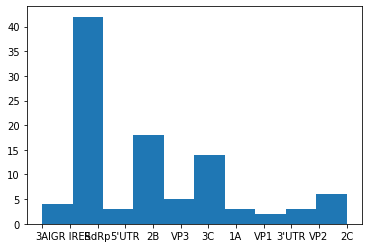

In [28]:
plt.hist(df_top['protein'])


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_78142/1596979753.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


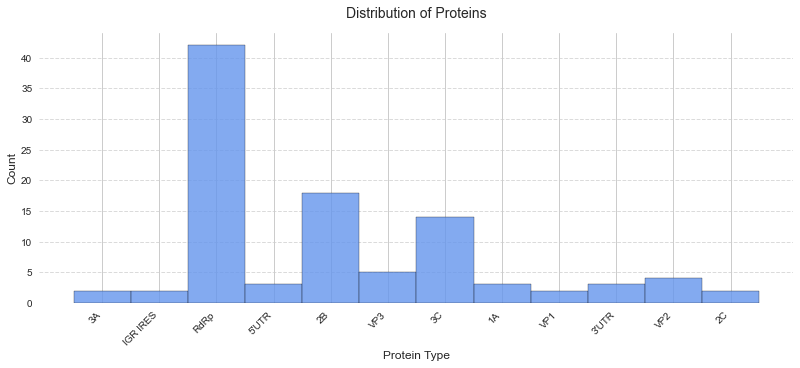

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and figure size
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

sns.set_style('whitegrid')
sns.set_context( font_scale=5)


# Create enhanced histogram
sns.histplot(data=df_top, x='protein', 
            color='cornflowerblue',
            edgecolor='black',
            alpha=0.8)

# Customize the plot
plt.title('Distribution of Proteins', fontsize=14, pad=15)
plt.xlabel('Protein Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


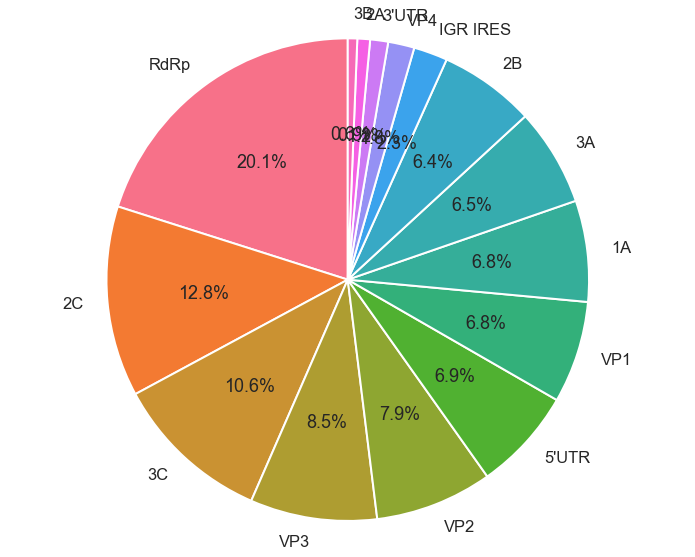

In [36]:
## now back to all mutations


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5)
plt.figure(figsize=(10, 8))

# Data from the histogram
proteins, frequencies = zip(*df['protein'].value_counts().items())


# Create pie chart
plt.pie(frequencies, 
        labels=proteins, autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('husl', len(proteins)),
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.axis('equal')
plt.tight_layout()
plt.show()



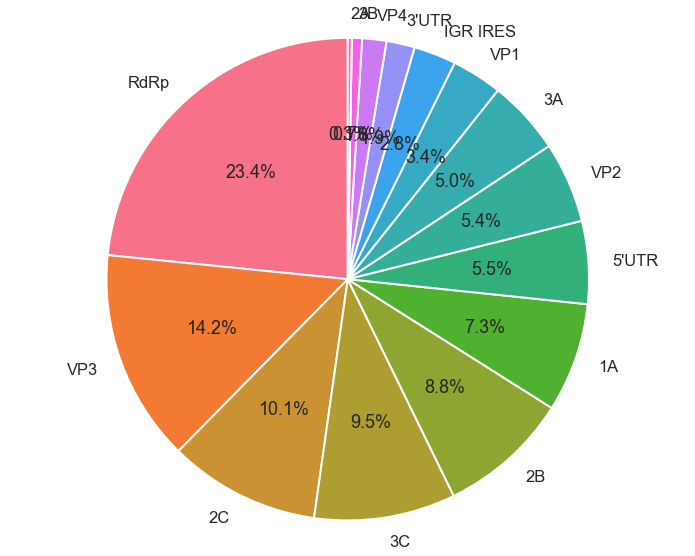

In [37]:
## now back to all mutations


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5)
plt.figure(figsize=(10, 8))

# Data from the histogram
proteins, frequencies = zip(*df[df['frequency']>0.01]['protein'].value_counts().items())


# Create pie chart
plt.pie(frequencies, 
        labels=proteins, autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('husl', len(proteins)),
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.axis('equal')
plt.tight_layout()
plt.show()